## 라이브러리

In [63]:
import sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import sklearn
from time import sleep
from itertools import combinations
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings(action='ignore')

In [64]:
#load packages
print("Python version: {}". format(sys.version))
print("pandas version: {}". format(pd.__version__))
print("NumPy version: {}". format(np.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))
print("seaborn version: {}". format(sns.__version__))
print("statsmodels version: {}". format(sm.__version__))
print("SciPy version: {}". format(sp.__version__))
print("scikit-learn version: {}". format(sklearn.__version__))

Python version: 3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.1.0
NumPy version: 1.18.4
matplotlib version: 3.1.3
seaborn version: 0.10.0
statsmodels version: 0.11.0
SciPy version: 1.4.1
scikit-learn version: 0.22.1


In [65]:
plt.style.use('seaborn-whitegrid')
plt.rc('font', family='Malgun Gothic')

## 데이터

In [66]:
f = "2020빅콘테스트_스포츠투아이_제공데이터_"
bat = pd.read_csv("./data/%s개인타자_2016.csv"%f, encoding='cp949')
bat.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,BAT_ORDER_NO,PA,...,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN
0,20160401HHLG0,20160401,HH,LG,0,T,60404,0,3,1,...,0,0,0,0,0,0,1,0.0,0,0
1,20160401HHLG0,20160401,LG,HH,0,B,61102,1,8,3,...,0,0,0,2,0,0,0,0.0,0,0
2,20160401HHLG0,20160401,LG,HH,0,B,61186,1,7,4,...,0,0,0,1,0,0,0,1.0,1,1
3,20160401HHLG0,20160401,LG,HH,0,B,62164,0,9,1,...,1,0,0,0,0,0,0,0.0,0,0
4,20160401HHLG0,20160401,HH,LG,0,T,62700,1,9,2,...,0,0,0,0,0,1,0,0.0,0,0


In [67]:
pit = pd.read_csv("./data/%s개인투수_2016.csv"%f, encoding='cp949')
pit.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,RELIEF_CK,CG_CK,...,KK,GD,WP,BK,ERR,R,ER,P_WHIP_RT,P2_WHIP_RT,CB_WHIP_RT
0,20160401HHLG0,20160401,LG,HH,0,B,60146,0,1,0,...,3,0,0,0,0,0,0,0.000000,1.000000,1.50
1,20160401HHLG0,20160401,LG,HH,0,B,61891,0,1,0,...,1,0,0,0,0,0,0,0.000000,1.800000,1.50
2,20160401HHLG0,20160401,LG,HH,0,B,62146,0,1,0,...,0,0,0,0,0,0,0,0.000000,3.000000,0.00
3,20160401HHLG0,20160401,LG,HH,0,B,62698,1,0,0,...,4,1,0,0,0,4,4,0.818182,1.588235,3.75
4,20160401HHLG0,20160401,HH,LG,0,T,65764,0,1,0,...,1,0,0,0,0,1,1,0.000000,1.500000,0.00


In [68]:
td = pd.read_csv("./data/%s선수_2016.csv"%f, encoding='cp949')
td.head()

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2016,60100,백창수,LG,내,28,4000만원
1,2016,60105,배민관,LG,투,25,2700만원
2,2016,60146,이승현,LG,투,25,3700만원
3,2016,60164,유경국,LG,투,25,2700만원
4,2016,60181,김지용,LG,투,28,4000만원


In [69]:
def batter(bat):
    bat_p = pd.DataFrame(columns=['T_ID', 'P_ID', 'AB', 'HIT', 'H2', 'H3', 'HR',
               'SH', 'BB', 'HP', 'KK', 'perHIT','perBASE','perSLUG','OPS','BABIP','FINAL_perHIT'])
    team = bat.T_ID.drop_duplicates().values

    for t in team:
        df = bat[bat.T_ID==t]
        playerno = df.P_ID.drop_duplicates().values
        gameno = df.G_ID.drop_duplicates().values
        
        for p in playerno:
            avg = df[df.P_ID==p].HIT.sum() / df[df.P_ID==p].AB.sum()
            df2 = df[(df.P_ID==p) & (df.G_ID.isin(gameno[:120]))].reset_index(drop=True)
            df2 = df2.drop(['G_ID', 'GDAY_DS', 'VS_T_ID', 'HEADER_NO', 'TB_SC',
                   'START_CK', 'BAT_ORDER_NO', 'PA', 'RBI', 'RUN',
                   'SB', 'CS', 'IB', 'GD', 'ERR', 'LOB', 'P_HRA_RT', 'P_AB_CN', 'P_HIT_CN'], axis=1)
            df2 = df2.groupby(['T_ID','P_ID']).sum().reset_index()
            df2['perHIT'] = df2.HIT / df2.AB
            df2['perBASE'] = (df2.HIT+df2.BB+df2.HP)/(df2.AB+df2.BB+df2.HP+df2.SF)
            df2['perSLUG'] = (df2.HIT+df2.H2*2+df2.H3*3+df2.HR*4) / (df2.AB)
            df2['OPS'] = df2.perBASE + df2.perSLUG
            df2['BABIP'] = (df2.HIT-df2.HR)/(df2.AB-df2.HR-df2.KK+df2.SF)
            df2['FINAL_perHIT'] = float(avg)
            df2.drop('SF', axis=1, inplace=True)
            bat_p = pd.concat([bat_p, df2])
    return bat_p

def mg(bat, td):
    bat = pd.merge(td, bat, on=['P_ID','T_ID'])
    bat = bat.dropna(axis=0).reset_index(drop=True)
    bat.MONEY = bat.MONEY.str.replace("만원","")
    bat.MONEY = bat.MONEY.str.replace("달러","")
    bat.MONEY = bat.MONEY.astype(int)
    return bat

In [70]:
bat16 = batter(pd.read_csv('./data/%s개인타자_2016.csv'%f, encoding='cp949'))
bat17 = batter(pd.read_csv('./data/%s개인타자_2017.csv'%f, encoding='cp949'))
bat18 = batter(pd.read_csv('./data/%s개인타자_2018.csv'%f, encoding='cp949'))
bat19 = batter(pd.read_csv('./data/%s개인타자_2019.csv'%f, encoding='cp949'))
td16 = pd.read_csv('./data/%s선수_2016.csv'%f, encoding='cp949').rename({'PCODE':'P_ID'}, axis='columns')
td17 = pd.read_csv('./data/%s선수_2017.csv'%f, encoding='cp949').rename({'PCODE':'P_ID'}, axis='columns')
td18 = pd.read_csv('./data/%s선수_2018.csv'%f, encoding='cp949').rename({'PCODE':'P_ID'}, axis='columns')
td19 = pd.read_csv('./data/%s선수_2019.csv'%f, encoding='cp949').rename({'PCODE':'P_ID'}, axis='columns')

In [71]:
train = pd.concat([mg(bat16, td16),mg(bat17, td17),mg(bat18, td18),mg(bat19, td19)])
train['H1']=train['HIT']-train['H2']-train['H3']-train['HR']
print(train.shape)
train.head()

(1041, 23)


,GYEAR,P_ID,NAME,T_ID,POSITION,AGE_VA,MONEY,AB,HIT,H2,...,BB,HP,KK,perHIT,perBASE,perSLUG,OPS,BABIP,FINAL_perHIT,H1
0,2016,60100,백창수,LG,내,28,4000,18,6,2,...,2,1,6,0.333333,0.428571,0.777778,1.206349,0.454545,0.333333,3
1,2016,60343,이해창,KT,포,29,2900,151,33,8,...,6,2,44,0.218543,0.254658,0.403974,0.658632,0.283019,0.203463,22
2,2016,60404,송주호,HH,외,28,4000,47,5,0,...,3,0,12,0.106383,0.160000,0.106383,0.266383,0.142857,0.106383,5
3,2016,60456,백상원,SS,내,28,4500,365,106,18,...,43,4,54,0.290411,0.365155,0.446575,0.811730,0.326984,0.287640,82
4,2016,60496,김선민,KT,내,26,3200,35,6,0,...,6,0,10,0.171429,0.292683,0.171429,0.464111,0.240000,0.220000,6


### 지표 정리
AB : 누적타수
HIT : 누적안타
BB : 누적볼넷
HP : 누적사구
SH : 누적희타
SF : 누적희플
H2 : 누적2타
H3 : 누적3타
HR : 누적홈런
KK : 누적삼진
perHIT : 누적타율
perBASE : 누적출루율
perSLUG : 누적장타율
FINAL_perHIT : 최중 타율 - y값



OPS : 출루율 + 장타력
출루율 : 안타+볼넷+사구 / 타수+볼넷+사구+희타
장타력 = 단타+2*2루타+3*3루타+4*홈런/타수

OPS : 출루율 + 장타력
babip : (총 안타수-홈런)/(타수-삼진-홈런+희생플라이)

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 0 to 266
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GYEAR         1041 non-null   int64  
 1   P_ID          1041 non-null   object 
 2   NAME          1041 non-null   object 
 3   T_ID          1041 non-null   object 
 4   POSITION      1041 non-null   object 
 5   AGE_VA        1041 non-null   int64  
 6   MONEY         1041 non-null   int32  
 7   AB            1041 non-null   object 
 8   HIT           1041 non-null   object 
 9   H2            1041 non-null   object 
 10  H3            1041 non-null   object 
 11  HR            1041 non-null   object 
 12  SH            1041 non-null   object 
 13  BB            1041 non-null   object 
 14  HP            1041 non-null   object 
 15  KK            1041 non-null   object 
 16  perHIT        1041 non-null   float64
 17  perBASE       1041 non-null   float64
 18  perSLUG       1041 non-null  

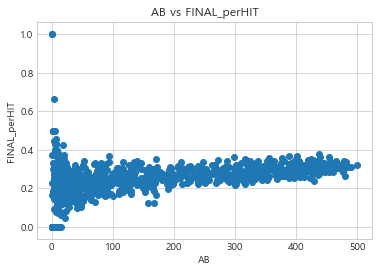

In [73]:
plt.scatter(train['AB'], train['FINAL_perHIT'])
plt.xlabel('AB')
plt.ylabel('FINAL_perHIT')
plt.title('AB vs FINAL_perHIT')
plt.show()

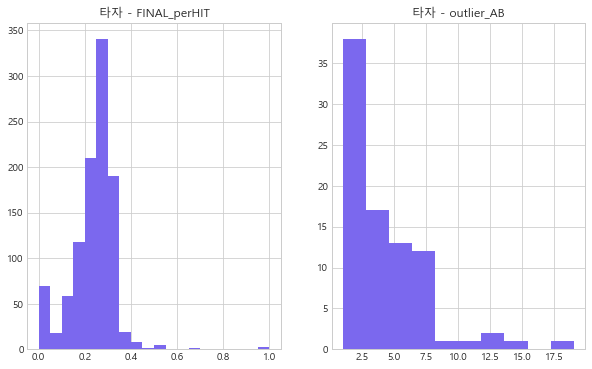

In [74]:
# 지금 final_perHIT 부분을 보면, 1점대, 0점대를 가지는 선수들이 존재 - 타석 수가 적으므로 25타석 이상인 선수만 생각
plt.figure(figsize=[10,6])

plt.subplot(1, 2, 1)
plt.hist(train['FINAL_perHIT'], bins=20, color='mediumslateblue')
plt.title('타자 - FINAL_perHIT')

plt.subplot(1, 2, 2)
plt.hist(train[np.logical_or(train['FINAL_perHIT']>=0.4, train['FINAL_perHIT']==0)]['AB'], color='mediumslateblue')
plt.title('타자 - outlier_AB')
plt.show()

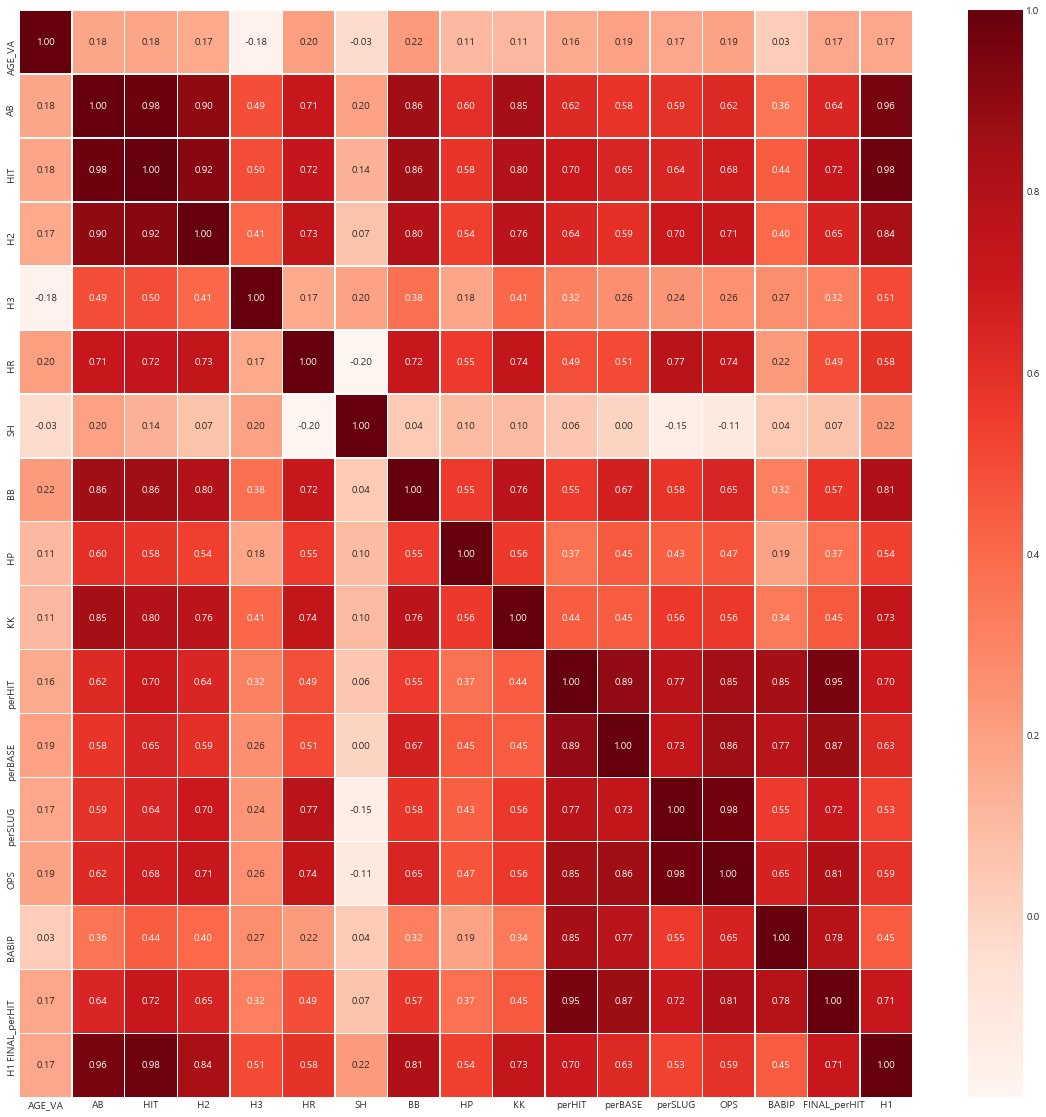

In [75]:
train_feature=train.drop(['GYEAR', 'P_ID', 'NAME', 'POSITION', 'T_ID', 'MONEY'], axis=1).astype('float')

train_remove=train_feature[train_feature['AB']>=25]

plt.figure(figsize=(20,20))
sns.heatmap(data = train_remove.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

해석

FINAL perHIT와 상관관계가 높은 변수 : PerHIT, perbase, perSLUG, OPS, BABIP

최종 타율이 안타/타수이기 때문에 hit, slug ops, base와 관련이 높음

문제 : perhit, perbase, perslug, perops, babip 값들의 상관관계가 많이 높음

이는 각 지표가 AB, HIT, BB, HP, H2, H3, HR, 등의 지표의 linear combination으로 이루어져있기 때문

AB와 상관관계 높은 지표 : HIT, BB, HP, H2, H3, HR, KK - 타수가 많을수록 각 값들이 당연히 많을 것이기 때문. HIT과 상관관계 높은 지표 : BB, HP, H2, H3, HR, KK

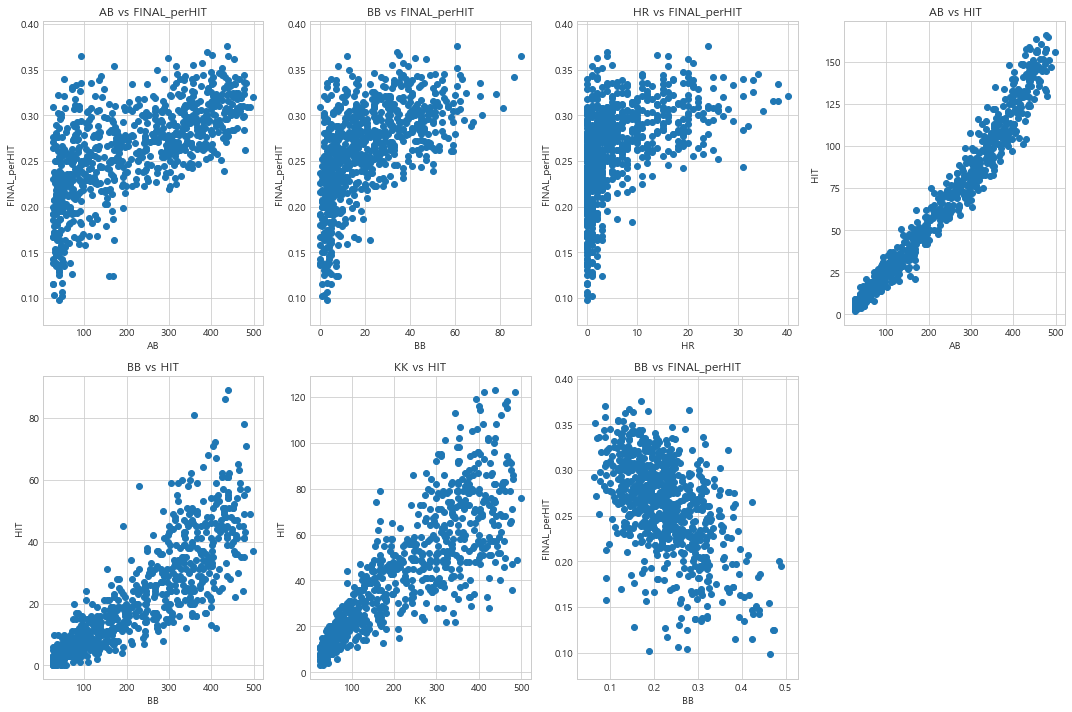

In [76]:
plt.figure(figsize=[15,10])
plt.subplot(2,4,1)
plt.scatter(train_remove['AB'], train_remove['FINAL_perHIT'])
plt.xlabel('AB')
plt.ylabel('FINAL_perHIT')
plt.title('AB vs FINAL_perHIT')

plt.subplot(2,4,2)
plt.scatter(train_remove['BB'], train_remove['FINAL_perHIT'])
plt.xlabel('BB')
plt.ylabel('FINAL_perHIT')
plt.title('BB vs FINAL_perHIT')

plt.subplot(2,4,3)
plt.scatter(train_remove['HR'], train_remove['FINAL_perHIT'])
plt.xlabel('HR')
plt.ylabel('FINAL_perHIT')
plt.title('HR vs FINAL_perHIT')

plt.subplot(2,4,4)
plt.scatter(train_remove['AB'], train_remove['HIT'])
plt.xlabel('AB')
plt.ylabel('HIT')
plt.title('AB vs HIT')

plt.subplot(2,4,5)
plt.scatter(train_remove['AB'], train_remove['BB'])
plt.xlabel('BB')
plt.ylabel('HIT')
plt.title('BB vs HIT')

plt.subplot(2,4,6)
plt.scatter(train_remove['AB'], train_remove['KK'])
plt.xlabel('KK')
plt.ylabel('HIT')
plt.title('KK vs HIT')

plt.subplot(2,4,7)
plt.scatter(train_remove['KK']/train_remove['AB'], train_remove['FINAL_perHIT'])
plt.xlabel('BB')
plt.ylabel('FINAL_perHIT')
plt.title('BB vs FINAL_perHIT')
plt.tight_layout()
plt.show()
#타석이 적을수록 편차가 많이 심함  - 타석 기준 변경 필요성

보면 알겠지만 대부분의 지표가 타석이 늘어날수록 지표도 커지는 것을 알 수 있음 (당연히 타석이 많을수록 HIT, BB, HP, H2, H3, HR, KK가 많음 - 양의 상관관계)

따라서 타석 대비 HIT, BB, HP, H2, H3, HR, KK로 해석해야 함

In [77]:
train_scaling=train_remove
train_scaling.columns

Index(['AGE_VA', 'AB', 'HIT', 'H2', 'H3', 'HR', 'SH', 'BB', 'HP', 'KK',
       'perHIT', 'perBASE', 'perSLUG', 'OPS', 'BABIP', 'FINAL_perHIT', 'H1'],
      dtype='object')

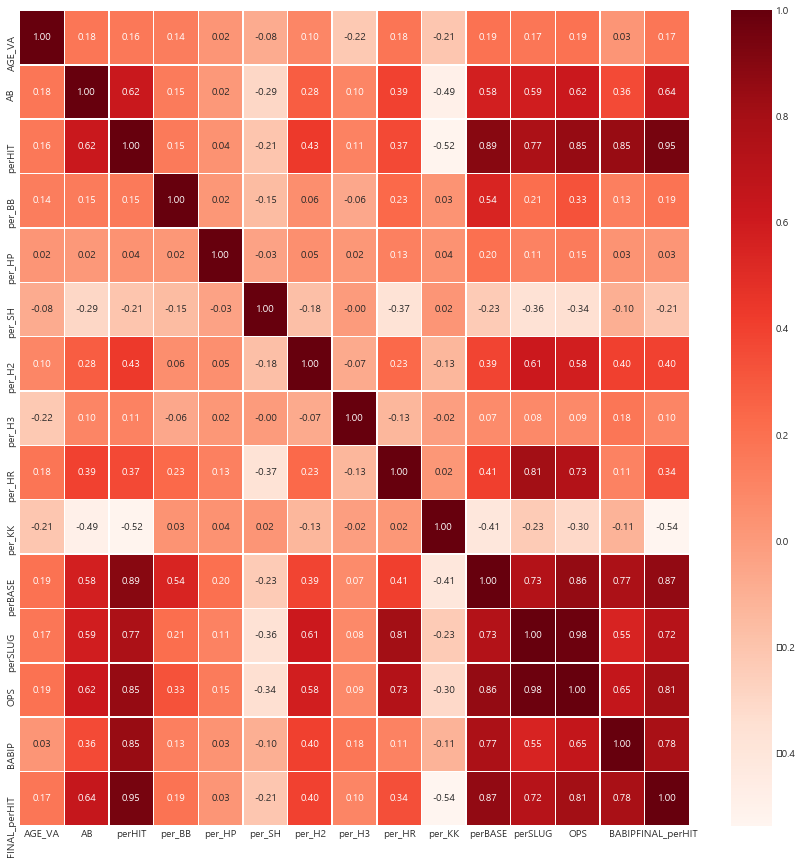

In [78]:
train_scaling['per_BB']=train_scaling['BB']/train_scaling['AB']
train_scaling['per_HP']=train_scaling['HP']/train_scaling['AB']
train_scaling['per_SH']=train_scaling['SH']/train_scaling['AB']
train_scaling['per_H1']=train_scaling['H1']/train_scaling['AB']
train_scaling['per_H2']=train_scaling['H2']/train_scaling['AB']
train_scaling['per_H3']=train_scaling['H3']/train_scaling['AB']
train_scaling['per_HR']=train_scaling['HR']/train_scaling['AB']
train_scaling['per_KK']=train_scaling['KK']/train_scaling['AB']

train_scaling=train_scaling[['AGE_VA', 'AB', 'perHIT', 'per_BB', 'per_HP', 'per_SH','per_H2', 'per_H3', 'per_HR', 'per_KK', 'perBASE', 'perSLUG', 'OPS', 'BABIP', 'FINAL_perHIT']]

plt.figure(figsize=(15,15))
sns.heatmap(data = train_scaling.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

해석 

FINAL_perHIT과 관련있는 변수 : AB, perHIT, per_KK, perBASE, perSLUG, OPS, BABIP

그런데 문제는 AB, perHIT, per_KK, perBASE, perSLUG, OPS, BABIP 변수 모두가 correlation이 크다는 점
이는 모든 변수가 AB를 분모로 사용하기 때문이고, 분자값은 타자 기본지표의 선형결합으로 되어 있기 때문
(특히 OPS는 perBASE+perSlUG로 구할 수 있기 때문)


지표 정리

AB : 누적타수
HIT : 누적안타
BB : 누적볼넷
HP : 누적사구
SH : 누적희타
H2 : 누적2타
H3 : 누적3타
Hr : 누적홈런
KK : 누적삼진
perHIT : 누적타율
perBASE : 누적출루율
perSLUG : 누적장타율
FINAL_perHIT : 최중 타율 - y값



OPS : 출루율 + 장타력
출루율 : 안타+볼넷+사구 / 타수+볼넷+사구+희타
장타력 = 단타+2*2루타+3*3루타+4*홈런/타수

OPS : 출루율 + 장타력
babip : (총 안타수-홈런)/(타수-삼진-홈런+희생플라이)


문제점

여러 지표를 보면 0인 값을 가지는 지표가 많이 존재 - 처리 어떻게 해야할지 모르겠음
다만 babip, ops, perslug와 같은 값들은 na값이 없진 않았음.

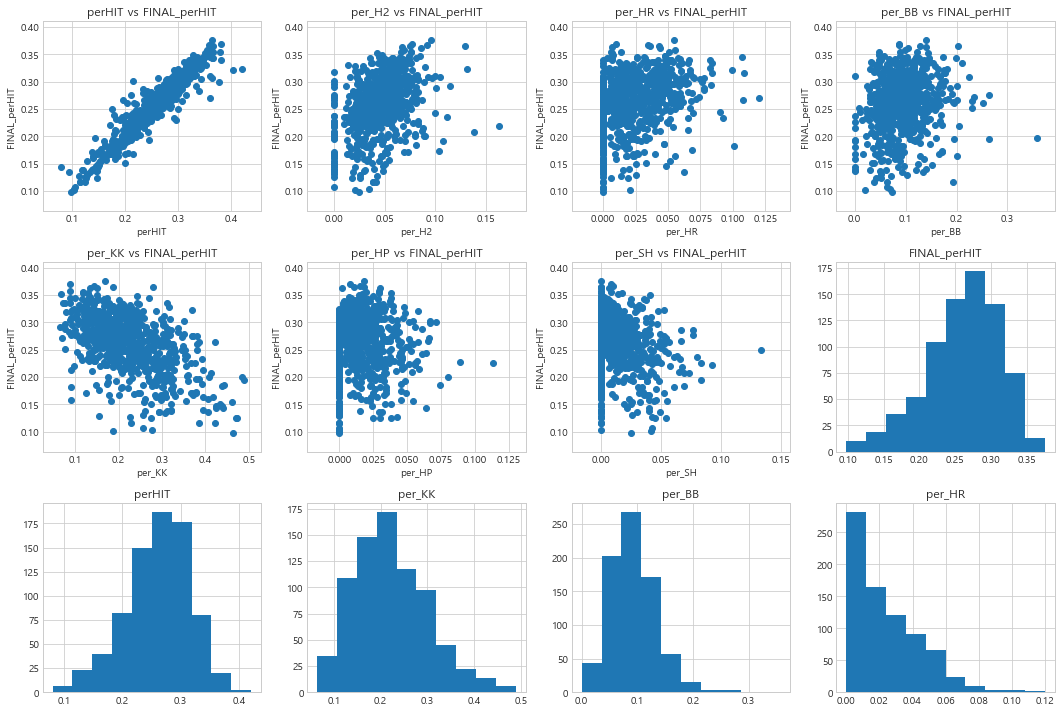

In [79]:
plt.figure(figsize=[15,10])
plt.subplot(3,4,1)
plt.scatter(train_scaling['perHIT'], train_scaling['FINAL_perHIT'])
plt.xlabel('perHIT')
plt.ylabel('FINAL_perHIT')
plt.title('perHIT vs FINAL_perHIT')

plt.subplot(3,4,2)
plt.scatter(train_scaling['per_H2'], train_scaling['FINAL_perHIT'])
plt.xlabel('per_H2')
plt.ylabel('FINAL_perHIT')
plt.title('per_H2 vs FINAL_perHIT')

plt.subplot(3,4,3)
plt.scatter(train_scaling['per_HR'], train_scaling['FINAL_perHIT'])
plt.xlabel('per_HR')
plt.ylabel('FINAL_perHIT')
plt.title('per_HR vs FINAL_perHIT')

plt.subplot(3,4,4)
plt.scatter(train_scaling['per_BB'], train_scaling['FINAL_perHIT'])
plt.xlabel('per_BB')
plt.ylabel('FINAL_perHIT')
plt.title('per_BB vs FINAL_perHIT')

plt.subplot(3,4,5)
plt.scatter(train_scaling['per_KK'], train_scaling['FINAL_perHIT'])
plt.xlabel('per_KK')
plt.ylabel('FINAL_perHIT')
plt.title('per_KK vs FINAL_perHIT')

plt.subplot(3,4,6)
plt.scatter(train_scaling['per_HP'], train_scaling['FINAL_perHIT'])
plt.xlabel('per_HP')
plt.ylabel('FINAL_perHIT')
plt.title('per_HP vs FINAL_perHIT')

plt.subplot(3,4,7)
plt.scatter(train_scaling['per_SH'], train_scaling['FINAL_perHIT'])
plt.xlabel('per_SH')
plt.ylabel('FINAL_perHIT')
plt.title('per_SH vs FINAL_perHIT')

plt.subplot(3,4,8)
plt.hist(train_scaling['FINAL_perHIT'])
plt.title('FINAL_perHIT')

plt.subplot(3,4,9)
plt.hist(train_scaling['perHIT'])
plt.title('perHIT')

plt.subplot(3,4,10)
plt.hist(train_scaling['per_KK'])
plt.title('per_KK')

plt.subplot(3,4,11)
plt.hist(train_scaling['per_BB'])
plt.title('per_BB')

plt.subplot(3,4,12)
plt.hist(train_scaling['per_HR'])
plt.title('per_HR')
plt.tight_layout()
plt.show()

### 기본 회귀분석 돌리기

In [80]:
#best subset selection

train_scaling_x=train_scaling.drop(['FINAL_perHIT'], axis=1)
train_scaling_y=train_scaling['FINAL_perHIT']

def bestsubset(x, y):
    BIC=[]
    feature=[]
    MAX_CON=[]
    MIN_CON=[]
    
    for i in range(x.shape[0]) :
        feature_list=list(combinations(x.columns, i+1))
        
        for j in range(len(feature_list)) :
            x_feature=x[list(feature_list[j])]
            sm.add_constant(x_feature)
            lm=sm.OLS(endog=y, exog=x_feature).fit()
            bic=lm.bic
            BIC.append(bic)
            max_con=np.max(lm.eigenvals)
            MAX_CON.append(max_con)
            min_con=np.min(lm.eigenvals)
            MIN_CON.append(min_con)

            if j%1000 ==0 :
                print('performing...')
       
        feature=feature+feature_list
        
    result=pd.DataFrame({'feature' : feature, 'BIC' : BIC, 'MAX_CON' : MAX_CON, 'MIN_CON' : MIN_CON})
    
    return(result)
        
bic_result=bestsubset(train_scaling_x, train_scaling_y)

performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...
performing...


In [81]:
bic_result=bic_result.sort_values('BIC').reset_index().drop('index', axis=1)
bic_result[bic_result['MAX_CON']<100000]

#bic가 가장 작으면서 multicollinearity 발생 안하는 perHIT, per_BB, per_HR, per_KK, babip로 진행

,feature,BIC,MAX_CON,MIN_CON
38,"(perHIT, per_BB, per_HR, per_KK, BABIP)",-4177.083586,175.047844,0.066666
43,"(perHIT, per_HR, per_KK, perBASE, BABIP)",-4176.718190,253.534205,0.055490
64,"(perHIT, per_HP, per_HR, per_KK, perBASE, BABIP)",-4175.677494,253.750817,0.054111
130,"(perHIT, per_BB, per_HP, per_HR, per_KK, perBA...",-4173.789608,260.589172,0.005822
192,"(perHIT, per_BB, per_HR, per_KK, perBASE, BABIP)",-4171.150712,260.372718,0.027128
...,...,...,...,...
16378,"(per_HP, per_H3)",-519.651245,0.410793,0.040427
16379,"(per_HP,)",-401.262713,0.402621,0.402621
16380,"(per_SH, per_H3)",-324.641452,0.383023,0.042779
16381,"(per_SH,)",-166.277494,0.377203,0.377203


In [82]:
lm_hitter5=smf.ols('FINAL_perHIT ~ perHIT + per_BB + per_HR + per_KK + BABIP', data=train_scaling).fit()
lm_hitter5.summary()
#문제가 per_KK가 p-value가 0.05보다 크기 때문에 이 모델에서 무의미한 지표 - 제외 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FINAL_perHIT   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     1553.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:39:33   Log-Likelihood:                 2109.1
No. Observations:                 767   AIC:                            -4206.
Df Residuals:                     761   BIC:                            -4178.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0240      0.008      2.821      0.005       0.007       0.041
perHIT         1.0671      0.087     12.285      0.000       0.897       1.238
per_BB         0.0574      0.014      4.204      0.000       0.031       0.084
per_HR        -0.1616      0.069     -2.340      0.020      -0.297      -0.026
per_KK         0.0223      0.028      0.804      0.422      -0.032       0.077
BABIP         -0.1538      0.063     -2.429      0.015      -0.278      -0.029
==============================================================================
Omnibus:                       74.059   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.795
Skew:                          -0.003   Prob(JB):                    5.86e-103
Kurtosis:                       6.838   Cond. No.                         253.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
lm_hitter6=smf.ols('FINAL_perHIT ~ perHIT + per_BB  + per_HR + BABIP', data=train_scaling).fit()
lm_hitter6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FINAL_perHIT   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     1943.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:39:33   Log-Likelihood:                 2108.8
No. Observations:                 767   AIC:                            -4208.
Df Residuals:                     762   BIC:                            -4184.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0303      0.003      9.629      0.000       0.024       0.036
perHIT         0.9997      0.023     44.324      0.000       0.955       1.044
per_BB         0.0577      0.014      4.228      0.000       0.031       0.084
per_HR        -0.1120      0.031     -3.598      0.000      -0.173      -0.051
BABIP         -0.1054      0.020     -5.301      0.000      -0.144      -0.066
==============================================================================
Omnibus:                       73.470   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.119
Skew:                          -0.007   Prob(JB):                    4.49e-101
Kurtosis:                       6.803   Cond. No.                         71.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression diagnostics

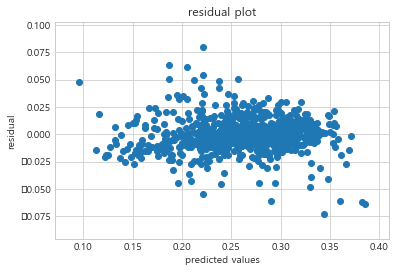

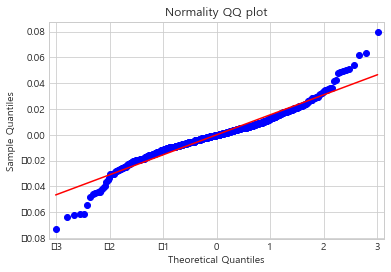

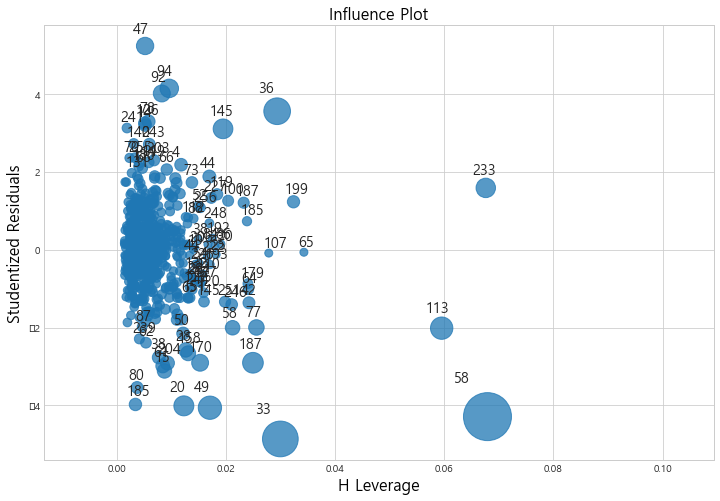

In [84]:
# residual plot check

ypred=lm_hitter6.fittedvalues
residual=lm_hitter6.resid


plt.scatter(ypred, residual)
plt.xlabel('predicted values')
plt.ylabel('residual')
plt.title('residual plot')
plt.show()

#looks like random, constant varaince 만족


#normality


fig=sm.qqplot(residual, line='s')
plt.title('Normality QQ plot')
plt.show()

# Influential observation


fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.influence_plot(lm_hitter6, ax=ax, criterion='cooks')
plt.show()


In [85]:
np.mean(residual**2)

# train data mse

0.00023955364493053125

# 19년도를 test set으로 이용하여 확인

In [86]:
train1618=train[train['GYEAR']<2019]
test19=train[train['GYEAR']==2019]

train1618=train1618[train1618['AB']>=25]
test19=test19[test19['AB']>=25]

train1618['per_BB']=train1618['BB']/train1618['AB']
train1618['per_HR']=train1618['HR']/train1618['AB']
test19['per_BB']=test19['BB']/test19['AB']
test19['per_HR']=test19['HR']/test19['AB']



train1618_x=train1618[['perHIT', 'per_HR', 'per_BB', 'BABIP']].astype('float')
train1618_y=train1618['FINAL_perHIT']

test19_x=test19[['perHIT', 'per_HR', 'per_BB', 'BABIP']].astype('float')
test19_y=test19['FINAL_perHIT']



In [87]:
lm_model=LinearRegression()
lm_model.fit(train1618_x, train1618_y)
lm_model.predict(test19_x)

array([0.14229424, 0.24273035, 0.25380435, 0.279793  , 0.26604255,
       0.19920189, 0.3155071 , 0.24922347, 0.33123803, 0.22319847,
       0.31692259, 0.30415222, 0.24967684, 0.26742179, 0.2213879 ,
       0.26416584, 0.26284346, 0.27892594, 0.33358749, 0.21189557,
       0.24890565, 0.27785598, 0.27337241, 0.25009931, 0.26727427,
       0.17777799, 0.18601525, 0.24975555, 0.19355639, 0.23343123,
       0.27858942, 0.3362683 , 0.22282565, 0.24697461, 0.24730944,
       0.22535519, 0.34861794, 0.26407227, 0.1594171 , 0.16446156,
       0.18804072, 0.34053332, 0.20887533, 0.14476941, 0.27299312,
       0.2364337 , 0.26358989, 0.29026366, 0.26100998, 0.19827655,
       0.15685078, 0.31267591, 0.18322267, 0.22945081, 0.22908221,
       0.19605307, 0.30858144, 0.24743233, 0.22284207, 0.2386708 ,
       0.28888192, 0.2588052 , 0.21560272, 0.23137078, 0.26683991,
       0.26926348, 0.18286567, 0.24203777, 0.22017932, 0.30110103,
       0.26947219, 0.28583498, 0.15499036, 0.23890072, 0.23711

### 팀별 최종 타율 예측

In [89]:
test19['ABPER']=test19['AB']/np.sum(test19['AB'])

TEAM_LIST = ['LG', 'SS', 'HH', 'LT', 'NC', 'HT', 'WO', 'SK', 'KT', 'OB']
for j in TEAM_LIST:
    s1 = "%s_%d = test19[(test19['T_ID']==j)&(test19['GYEAR']==2019)]"%(j, 2019)
    exec(s1)
for j in TEAM_LIST:
    s2 = "%s_%d['ABPER']=%s_%d['AB']/%s_%d['AB'].sum()"%(j, 2019,j,2019,j,2019)
    exec(s2)
for j in TEAM_LIST:
    s3 = "%s_%d['PRED']=lm_model.predict(%s_%d[['perHIT','per_HR','per_BB', 'BABIP']])"%(j, 2019, j, 2019)
    exec(s3)
for j in TEAM_LIST:
    s4="%s_%d_pred=sum(%s_%d['PRED']*%s_%d['ABPER'])"%(j,2019,j,2019,j,2019)
    exec(s4)

pred_perHIT=[LG_2019_pred, SS_2019_pred, HH_2019_pred, LT_2019_pred, NC_2019_pred, HT_2019_pred, WO_2019_pred, SK_2019_pred, KT_2019_pred, OB_2019_pred]

team_perHIT=pd.DataFrame({'Team' : TEAM_LIST, 'pred_perHIT' : pred_perHIT})
team_perHIT['True_perHIT']=[0.267, 0.256, 0.256, 0.250, 0.278, 0.264, 0.282, 0.262, 0.277, 0.278]

print(team_perHIT)
print('-----------------------------------')
print('MAE : ', np.mean(np.abs(team_perHIT['pred_perHIT']-team_perHIT['True_perHIT'])))

  Team  pred_perHIT  True_perHIT
0   LG     0.273214        0.267
1   SS     0.264012        0.256
2   HH     0.258991        0.256
3   LT     0.260006        0.250
4   NC     0.281804        0.278
5   HT     0.269208        0.264
6   WO     0.285070        0.282
7   SK     0.271683        0.262
8   KT     0.279372        0.277
9   OB     0.282991        0.278
-----------------------------------
MAE :  0.005635022959022851


# 잔여 경기 팀별 타율 예측

In [90]:
team_perHIT=team_perHIT.groupby('Team').sum()

In [91]:
test19['AB']=test19['AB'].astype('float')
test19['HIT']=test19['HIT'].astype('float')

In [92]:
team_perHIT['true_24perHIT']=[0.2608, 0.2356, 0.2671, 0.2225, 0.2814, 0.2578, 0.2775, 0.2360, 0.2802, 0.2807]
t=test19.groupby('T_ID').sum()[['AB', 'HIT']]
true_120_perhit=t['HIT']/t['AB']
team_perHIT['true_120_perHIT']=true_120_perhit
team_perHIT['pred_24perHIT']=144/24*(team_perHIT['pred_perHIT']-120*team_perHIT['true_120_perHIT']/144)

Result=team_perHIT[['pred_24perHIT', 'true_24perHIT']].rename(columns={'true_24perHIT' : 'perHIT_24', 'pred_24perHIT' : 'pred_perHIT_24'})

In [93]:
print(Result)
print('--------------------------------')
print('MAE : ', np.mean(np.abs(Result['pred_perHIT_24']-Result['perHIT_24'])))

# 24경기 팀 타율 mae값이 0.47로 높게 나옴.

      pred_perHIT_24  perHIT_24
Team                           
HH          0.271117     0.2608
HT          0.290108     0.2356
KT          0.282527     0.2671
LG          0.282410     0.2225
LT          0.272785     0.2814
NC          0.287185     0.2578
OB          0.302796     0.2775
SK          0.279895     0.2360
SS          0.280757     0.2802
WO          0.287963     0.2807
--------------------------------
MAE :  0.0255171398441221


# 잔여경기 MAE 차이 원인

1. 최종 타율의 오차가 조금만 커져도 잔여경기 오차가 차이가 많이 남 (이는 최종 타율에서 120경기 타율이 사용되었기 때문)
2. 최종 타율 값에서 120경기 타율이 차지하는 비중이 큼
3. 모델을 만들 때 시간 지표(ex : 연도)를 반영하지 못함
4. 모델을 만들 때 팀 지표(팀의 특징 등등)를 반영하지 못함.